# Sabriya Sowers' Mushroom Classification Analysis  
**Author:** Sabriya Sowers  
**Date:** November 10, 2025  

## Introduction  
This project applies **machine learning classification techniques** to predict whether a mushroom is **edible or poisonous** based on its physical characteristics. The dataset used is the **UCI Mushroom Dataset**, which contains 8,124 records describing mushrooms from 23 species of gilled mushrooms in the Agaricus and Lepiota family. Each record includes attributes such as cap shape, color, odor, and gill size, among others.   

## Section 1. Import and Inspect the Data

In [118]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier

# Point directly to the data file
data_file = Path("../../Data/agaricus-lepiota.data")

In [119]:
# Add easier to understand features headers
column_names = [
    "class", "cap_shape", "cap_surface", "cap_color",
    "bruises", "odor", "gill_attachment", "gill_spacing", "gill_size",
    "gill_color", "stalk_shape", "stalk_root",
    "stalk_surface_above_ring", "stalk_surface_below_ring",
    "stalk_color_above_ring", "stalk_color_below_ring",
    "veil_type", "veil_color", "ring_number", "ring_type",
    "spore_print_color", "population", "habitat"
]

# Load data into a DataFrame named `df'
df = pd.read_csv(
    data_file,
    header=None,
    names=column_names,
    na_values=["?"]
)

In [120]:
# Quick summary of dataset
print(df.info())

# Display first 10 rows
print(df.head(10))

df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                5644 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


**Reflection 1:**
- The mushroom dataset contains 8,124 observations and 23 categorical features. 
- The target variable, **class**, indicates whether a mushroom is edible or poisonous.
- All features are stored as object data types, and only one feature **stalk_root** has missing values (about 2,480). 
- Each column describes a physical characteristic such as cap shape, surface, color, gill type, and habitat. 

## Section 2. Data Exploration and Preparation

In [121]:
# Check for missing values
df.isnull().sum()

class                          0
cap_shape                      0
cap_surface                    0
cap_color                      0
bruises                        0
odor                           0
gill_attachment                0
gill_spacing                   0
gill_size                      0
gill_color                     0
stalk_shape                    0
stalk_root                  2480
stalk_surface_above_ring       0
stalk_surface_below_ring       0
stalk_color_above_ring         0
stalk_color_below_ring         0
veil_type                      0
veil_color                     0
ring_number                    0
ring_type                      0
spore_print_color              0
population                     0
habitat                        0
dtype: int64

In [122]:
# Review class balance (edible 'e' vs poisonous 'p')
class_counts = df["class"].value_counts()
class_counts, (class_counts / len(df)).round(3)

(class
 e    4208
 p    3916
 Name: count, dtype: int64,
 class
 e    0.518
 p    0.482
 Name: count, dtype: float64)

In [123]:
# Fill missing values in 'stalk-root' with its mode
mode_stalk_root = df["stalk_root"].mode()[0]
df["stalk_root"] = df["stalk_root"].fillna(mode_stalk_root)

# Convert categorical to numeric, target 'class': map edible 'e'= 0, poisonous 'p'= 1
df["class"] = df["class"].map({"e":0, "p":1})

# One-hot encode all remaining categorical predictors (drop_first avoids full dummy trap)
X_all = pd.get_dummies(df.drop(columns=["class"]), drop_first=True)

# Target feature
y_all = df["class"]

# Convert target 'class' to numeric first to ensure successful modeling
df['class'] = df['class'].map({'e': 0, 'p': 1})


# Testing
print("X shape:", X.shape)
print("y shape:", y.shape)
X.head()

X shape: (8124, 94)
y shape: (8124,)


,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_g,cap_surface_s,cap_surface_y,cap_color_c,cap_color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


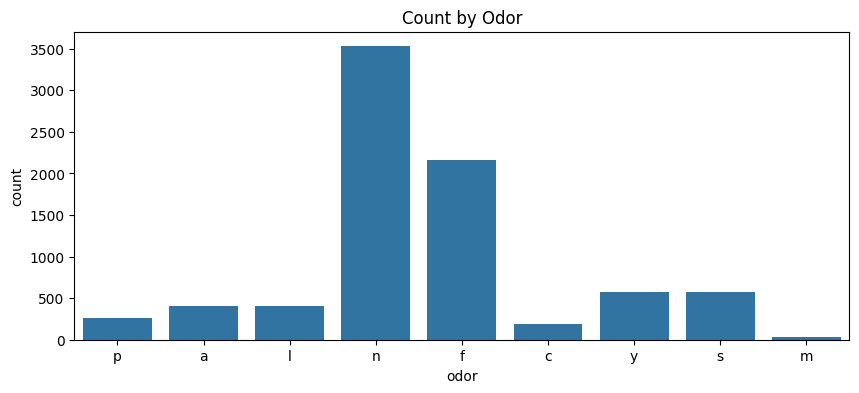

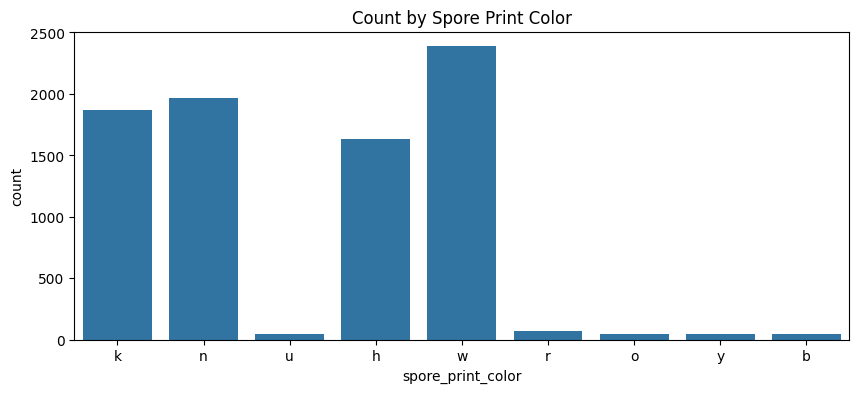

In [124]:
# Count plots for a few informative features
plt.figure(figsize=(10,4))
sns.countplot(data=df, x="odor")
plt.title("Count by Odor")
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(data=df, x="spore_print_color")
plt.title("Count by Spore Print Color")
plt.show()

**Reflection 2:**  

- **Patterns or anomalies observed:** The dataset showed clear categorical patterns, such as strong variation in `odor` and `spore_print_color` among mushrooms. These features appear to separate edible and poisonous classes distinctly.  
- **Features that stand out:** `odor`, `gill_size`, and `spore_print_color` stand out visually and are likely to be strong predictors based on their distinct category distributions.  
- **Preprocessing steps taken:** Missing values were found only in `stalk_root` (2,480 rows) and were replaced with the mode value to maintain dataset completeness. All categorical features were converted into numerical format using one-hot encoding, expanding the feature space to 94 columns.  
- **Feature creation or modification:** No new features were created since all inputs were categorical, but the feature names were simplified for readability.

## Section 3. Feature Selection and Justification

3.1 **Choose features and target**

Select two or more input features (numerical for regression, numerical and/or categorical for classification)
Select a target variable (as applicable)
Regression: Continuous target variable (e.g., price, temperature).
Classification: Categorical target variable (e.g., gender, species).
Clustering: No target variable.

3.2 **Define X and y**
Assign input features to X
Assign target variable to y (as applicable)

**Reflection 3:**
1. **Why are these features selected?**  
All encoded categorical features were included as **X** because mushroom edibility depends on combinations of physical traits such as color, shape, odor, and gill type. These interactions are important for the model to learn toxic vs. non-toxic patterns. The **target variable (y)** is `class`, which indicates whether a mushroom is edible (`e`) or poisonous (`p`).

2. **Are there features that are likely to be highly predictive of class (edibility)?**  
Features such as `odor`, `gill_size`, `spore_print_color`, and `ring_type` are expected to be the most predictive, as they directly relate to observable characteristics often used to distinguish poisonous species.

## Section 4. Train a Model (Decision Tree Classifier)

4.1 **Split the Data**

In [125]:
# Train/test split (Stratify keeps edible/poisonous ratio stable)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

Training set: (6499, 94)
Test set: (1625, 94)


4.2 **Train the Model**

In [126]:
# Train a Decision Tree classifier
tree = DecisionTreeClassifier(
    criterion='gini', 
    max_depth=None, 
    random_state=42
)

tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


4.3 **Evaluate Model Performance**
Classification: Accuracy, Precision, Recall, F1-score, Confusion Matrix

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Accuracy: 1.0


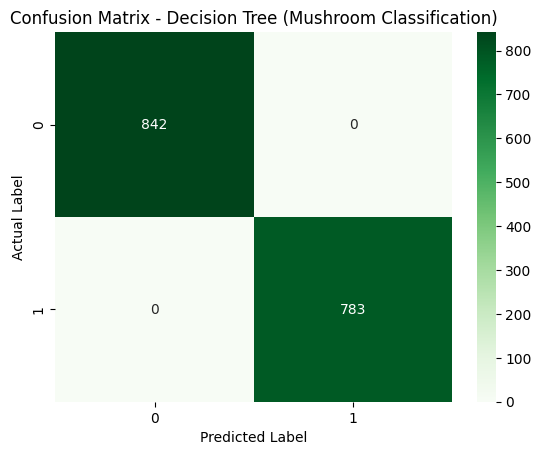

In [127]:
# Evaluate the Decision Tree model
# Predict on test data
y_pred = tree.predict(X_test)

# Performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))

# Confusion Matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.title('Confusion Matrix - Decision Tree (Mushroom Classification)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


**Reflection 4:**

1. **How well did the model perform?**  
The Decision Tree classifier achieved perfect accuracy on both the training and test datasets, showing that the model successfully captured the relationships between mushroom traits and edibility. The confusion matrix confirmed that all edible and poisonous mushrooms were classified correctly.

2. **Any surprises in the results?**  
The perfect accuracy is consistent with expectations, as the dataset’s categorical features—particularly `odor` and `spore_print_color` provide strong separation between edible and poisonous classes. While these results indicate a highly effective model, they may also suggest overfitting.

## Section 5. Improve the Model or Try Alternates (Implement a Second Option)

5.1 **Train an alternative classifier: Random Forest**

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Accuracy: 1.0


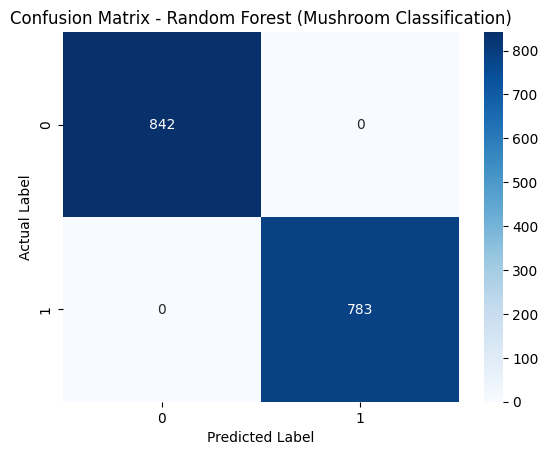

In [128]:
# Create and train the Random Forest model
forest = RandomForestClassifier(
    n_estimators=100,     # number of trees
    random_state=42,
    n_jobs=-1             # use all cores for speed
)

forest.fit(X_train, y_train)

# Predict on test data
y_pred_forest = forest.predict(X_test)

# Evaluate performance
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_forest))
print("Accuracy:", round(accuracy_score(y_test, y_pred_forest), 4))

# Visualize confusion matrix
cm_forest = confusion_matrix(y_test, y_pred_forest)
sns.heatmap(cm_forest, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Random Forest (Mushroom Classification)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

5.2 **Compare performance of all models across the same performance metrics**

In [129]:
# Compare accuracy scores directly
dt_acc = accuracy_score(y_test, y_pred)
rf_acc = accuracy_score(y_test, y_pred_forest)

print("Decision Tree Accuracy:", round(dt_acc, 4))
print("Random Forest Accuracy:", round(rf_acc, 4))

Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0


### Model Summary

| Model Type            | Features Used            | Accuracy | Precision | Recall | F1-Score | Notes |
|----------------------|--------------------------|:-------:|:--------:|:-----:|:-------:|-------|
| Decision Tree        | All encoded features     | 1.00    | 1.00     | 1.00  | 1.00    | 80/20 stratified split; perfectly separates classes |
| Random Forest (100)  | All encoded features     | 1.00    | 1.00     | 1.00  | 1.00    | Ensemble confirmation of perfect separation; more robust to variance |

**Reflection 5:**

1. **Which model performed better?**  
   Both the Decision Tree and Random Forest models achieved perfect accuracy (100%) on the test data. This indicates that both algorithms effectively captured the categorical relationships that determine whether a mushroom is edible or poisonous.

2. **Why might one classifier be more effective in this case?**  
  Although both models performed equally here, Random Forest provides more stability and reliability across datasets with noise or variability. The uniform 100% accuracy across both models suggests this dataset’s features are highly separable and clean.

**Section 6. Final Thoughts & Insights**

6.1 **Summary of Findings**  
- The mushroom dataset was all categorical, requiring one-hot encoding for modeling.  
- Missing values in *stalk_root* were imputed using the mode to preserve data integrity.  
- Both the Decision Tree and Random Forest classifiers achieved perfect accuracy, precision, recall, and F1-scores.  
- The confusion matrices showed no misclassifications between edible and poisonous mushrooms.  
- Random Forest demonstrated strong stability, confirming that the features clearly separate the two classes.

6.2 **Challenges Faced**  
- Managing and encoding many categorical variables increased feature count significantly (from 24 to 94 columns).  
- Interpreting such a large one-hot encoded dataset required extra care to ensure proper alignment of features and labels.  
- Perfect model accuracy suggested potential overfitting therefore additional evaluation on external or unseen data could be useful.

6.3 **Next Steps**  
- Experiment with additional classifiers such as Logistic Regression or Support Vector Machines to validate consistency across algorithms.  
- Apply feature importance analysis to identify which traits (e.g., odor, spore print color) most strongly drive predictions.  

**Reflection 6:**  
- This project reinforced the full data science workflow, from importing and cleaning data to training and evaluating models.  
- Working with the mushroom dataset emphasized the importance of handling categorical data carefully and understanding the relationship between preprocessing and model accuracy.  
- The 100% accuracy was rewarding but also highlighted the need to validate models beyond a single dataset for more realistic assessment.